# Clustering on the Cineplex Concessions

- Stephen W. Thomas
- October 2020
- For: MMA/GMMA/MMAI 869

This Notebook will do some basic clustering on the Cineplex members.

In [3]:
import pandas as pd
import numpy as np

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# Load in the data files

In [4]:
version_str = "_v3"
input_dir = "clean_v3/"

In [5]:
visits = pd.read_csv(input_dir+'visits'+version_str+'.csv')
# Extract some info about the date
visits['Visit_Date'] = pd.to_datetime(visits['Visit_Date'])
visits['Visit_Date_DOW'] = visits['Visit_Date'].dt.day_name()
visits['Visit_Date_Week'] = visits['Visit_Date'].dt.strftime('%U')
visits['Visit_Date_Month'] = visits['Visit_Date'].dt.month_name()
visits['Visit_Date_IsWeekend'] = np.where(visits['Visit_Date'].dt.weekday < 5, 0, 1)
visits['Visit_Date_IsTuesday'] = np.where(visits['Visit_Date'].dt.weekday == 1, 1, 0)
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36258 entries, 0 to 36257
Data columns (total 29 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Visit_ID                   36258 non-null  int64         
 1   CINEPLEX_D_Membership_ID   36258 non-null  int64         
 2   Visit_Date                 36258 non-null  datetime64[ns]
 3   Visit_TimeSlice_ID         36258 non-null  int64         
 4   Location_ID                36258 non-null  int64         
 5   Auditorium_Experience_ID   36258 non-null  int64         
 6   Film_ID                    36258 non-null  int64         
 7   Seating_Experience_ID      36258 non-null  int64         
 8   Sales_Channel_ID           36258 non-null  int64         
 9   Performance_Experience_ID  36258 non-null  int64         
 10  Performance_Type_ID        36258 non-null  int64         
 11  Spend                      36258 non-null  float64       
 12  Reve

In [6]:
items = pd.read_csv(input_dir+'items'+version_str+'.csv', encoding = "ISO-8859-1")
items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 363 entries, 0 to 362
Data columns (total 20 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   CINEPLEX_Item_ID           363 non-null    int64 
 1   CINEPLEX_Item_Description  363 non-null    object
 2   CINEPLEX_Item_Status       363 non-null    object
 3   EIS_Group_Description      363 non-null    object
 4   EIS_Sub_Group_Description  363 non-null    object
 5   Item_Report_Code2          363 non-null    object
 6   Item_Report_Code3          363 non-null    object
 7   Item_Class_Description1    363 non-null    object
 8   Item_Class_Description2    363 non-null    int64 
 9   Item_Class_Description3    363 non-null    object
 10  Is_Item_Package            363 non-null    int64 
 11  Is_Box_Office_Item         363 non-null    int64 
 12  US_Is_Butter               363 non-null    int64 
 13  US_Is_Kiddietray           363 non-null    int64 
 14  US_Is_Vouc

In [7]:
visits_items = pd.read_csv(input_dir+'visit_items'+version_str+'.csv', encoding = "ISO-8859-1")
visits_items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170060 entries, 0 to 170059
Data columns (total 8 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Visit_ID                  170060 non-null  int64  
 1   CINEPLEX_D_Membership_ID  170060 non-null  int64  
 2   CINEPLEX_Item_ID          170060 non-null  int64  
 3   Spend                     170060 non-null  float64
 4   Discount                  170060 non-null  float64
 5   Revenue                   170060 non-null  float64
 6   Points_Earned             170060 non-null  int64  
 7   Points_Redeemed           170060 non-null  int64  
dtypes: float64(3), int64(5)
memory usage: 10.4 MB


In [8]:
films = pd.read_csv(input_dir+'films'+version_str+'.csv', encoding = "ISO-8859-1")
films.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25942 entries, 0 to 25941
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Film_ID                  25942 non-null  int64  
 1   Film_Title               25941 non-null  object 
 2   Title_ID                 25941 non-null  float64
 3   Title_Name               25940 non-null  object 
 4   Theatrical_Release_Date  25942 non-null  object 
 5   Film_Runtime             25941 non-null  float64
 6   Language                 25942 non-null  object 
 7   Market_Language          25942 non-null  object 
 8   Release_Pattern          25941 non-null  object 
 9   Performance_Type         25942 non-null  object 
 10  Is_IMAX                  25942 non-null  object 
 11  Is_DBOX_Capable          25942 non-null  object 
 12  Release_Status           25941 non-null  object 
 13  Media_Class_Description  25941 non-null  object 
 14  Is_4Dx                

In [9]:
experience_type = pd.read_csv(input_dir+'experience_type'+version_str+'.csv', encoding = "ISO-8859-1")
experience_type.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 3 columns):
 #   Column                             Non-Null Count  Dtype 
---  ------                             --------------  ----- 
 0   Auditorium_Experience_ID           9 non-null      int64 
 1   Auditorium_Experience_Description  9 non-null      object
 2   Is_Premium                         9 non-null      int64 
dtypes: int64(2), object(1)
memory usage: 344.0+ bytes


In [10]:
sales_channels = pd.read_csv(input_dir+'sales_channels'+version_str+'.csv', encoding = "ISO-8859-1")
sales_channels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Sales_Channel_ID  11 non-null     int64 
 1   Sales_Channel     11 non-null     object
dtypes: int64(1), object(1)
memory usage: 304.0+ bytes


In [11]:
timeslice = pd.read_csv(input_dir+'timeslice'+version_str+'.csv', encoding = "ISO-8859-1")
timeslice.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49 entries, 0 to 48
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   TimeSlice_ID           49 non-null     int64 
 1   TimeSlice_Description  49 non-null     object
 2   TimeSlice_Start_Time   49 non-null     object
 3   TimeSlice_End_Time     49 non-null     object
 4   TimeSlice_Hour_12      49 non-null     object
 5   TimeSlice_Hour_24      49 non-null     int64 
dtypes: int64(2), object(4)
memory usage: 2.4+ KB


In [12]:
locations = pd.read_csv(input_dir+'locations'+version_str+'.csv', encoding = "ISO-8859-1")
locations.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 496 entries, 0 to 495
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Location_ID                496 non-null    int64 
 1   Location_Name              495 non-null    object
 2   Location_Short_Name        492 non-null    object
 3   Location_Interactive_Name  494 non-null    object
 4   Address1                   483 non-null    object
 5   City                       489 non-null    object
 6   Province_CD                496 non-null    object
 7   Postal_Code                438 non-null    object
 8   Country_CD                 496 non-null    object
 9   Is_VIP                     496 non-null    int64 
 10  Is_Outtakes                496 non-null    int64 
 11  Is_Licensed_Bar            496 non-null    int64 
 12  Is_Licensed_Lounge         496 non-null    int64 
dtypes: int64(5), object(8)
memory usage: 50.5+ KB


## Visits

Visits is the main "fact" table in the dataset. Let's first merge (join) it with all the dimension tables, and then we can summarize how often everything occurs.

In [13]:
visits = visits.merge(films, how="left")
visits = visits.merge(experience_type, how="left")
visits = visits.merge(sales_channels, how="left")
visits = visits.merge(timeslice, left_on="Visit_TimeSlice_ID", right_on="TimeSlice_ID", how="left")
visits = visits.merge(locations, how="left")

In [14]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None, 'display.float_format', lambda x: '%.1f' % x):
    display(visits.head())

,Visit_ID,CINEPLEX_D_Membership_ID,Visit_Date,Visit_TimeSlice_ID,Location_ID,Auditorium_Experience_ID,Film_ID,Seating_Experience_ID,Sales_Channel_ID,Performance_Experience_ID,Performance_Type_ID,Spend,Revenue,Points_Earned,Points_Redeemed,Discount,Has_US_Is_LrgPopcorn,Has_US_Is_Butter,Has_US_Is_Alcohol,Has_US_Is_Candy,Has_US_Is_Coffee,Has_US_Is_Kiddietray,Has_US_Is_Voucher,Has_US_Is_MenuFood,Visit_Date_DOW,Visit_Date_Week,Visit_Date_Month,Visit_Date_IsWeekend,Visit_Date_IsTuesday,Film_Title,Title_ID,Title_Name,Theatrical_Release_Date,Film_Runtime,Language,Market_Language,Release_Pattern,Performance_Type,Is_IMAX,Is_DBOX_Capable,Release_Status,Media_Class_Description,Is_4Dx,Genre_Hierarchy_1,Auditorium_Experience_Description,Is_Premium,Sales_Channel,TimeSlice_ID,TimeSlice_Description,TimeSlice_Start_Time,TimeSlice_End_Time,TimeSlice_Hour_12,TimeSlice_Hour_24,Location_Name,Location_Short_Name,Location_Interactive_Name,Address1,City,Province_CD,Postal_Code,Country_CD,Is_VIP,Is_Outtakes,Is_Licensed_Bar,Is_Licensed_Lounge
0,2,23777,2019-01-01,15,7253,1,28757,1,8,1,1,15.0,15.0,100,0,1.7,0,0,0,0,0,0,0,0,Tuesday,00,January,0,1,Vice,23956.0,Vice,12/25/2018,133.0,English,English,Wide,Film Presentation,0,0,A,Adult,0.0,Drama,Regular,0,Point of Sale,15,1 - Early Matinee,00:00.0,30:00.0,1:00 PM,13,CPX Eglinton T.C.,Warden&Eglin,Cineplex Odeon Eglinton Town Centre Cinemas,22 Lebovic Avenue,Toronto,ON,M1L 4V9,CA,0,1,1,0
1,3,60723,2019-01-01,15,7123,0,0,0,8,0,0,29.6,29.6,297,0,3.3,0,1,0,0,0,0,1,1,Tuesday,00,January,0,1,<None>,0.0,<None>,1/1/1900,0.0,<None>,<None>,<None>,<None>,0,0,B,None,0.0,Unknown,<Unknown>,0,Point of Sale,15,1 - Early Matinee,00:00.0,30:00.0,1:00 PM,13,CPX Winston Churchill VIP,Winston Churchill,Cineplex Cinemas Winston Churchill & VIP,2081 Winston Park Dr.,Oakville,ON,L6H 6P5,CA,1,1,1,0
2,4,61080,2019-01-01,15,7290,2,24899,2,8,2,1,28.4,28.4,235,0,3.2,1,1,0,0,0,0,0,0,Tuesday,00,January,0,1,Aquaman,22133.0,Aquaman,12/21/2018,143.0,English,English,Wide,Film Presentation,0,1,A,Adult,0.0,Adaptation,AVX,1,Point of Sale,15,1 - Early Matinee,00:00.0,30:00.0,1:00 PM,13,CPX Hamilton Mountain,CPX Hamilton,Cineplex Cinemas Hamilton Mountain,795 Paramount Drive,Stoney Creek,ON,L8J 0B4,CA,0,1,1,0
3,5,103538,2019-01-01,14,1142,1,24977,1,2,1,1,0.0,10.0,0,1000,0.0,0,0,0,0,0,0,0,0,Tuesday,00,January,0,1,Mary Poppins Returns,22187.0,Mary Poppins Returns,12/19/2018,131.0,English,English,Wide,Film Presentation,0,1,A,Family,0.0,Comedy,Regular,0,Kiosk,14,1 - Early Matinee,30:00.0,00:00.0,12:00 PM,12,CPX Pitt Meadows,Meadowtown,Cineplex Odeon Meadowtown Cinemas,"#410, 19800 Lougheed Highway",Pitt Meadows,BC,V3Y 2W1,CA,0,1,0,0
4,6,120196,2019-01-01,23,9181,1,29694,1,2,1,1,17.6,17.6,100,0,1.9,0,0,0,0,0,0,0,0,Tuesday,00,January,0,1,DeuxiÂme acte,23976.0,Second Act,12/21/2018,104.0,French,French,Wide,Film Presentation,0,0,A,Adult,0.0,Comedy,Regular,0,Kiosk,23,2 - Late Matinee,00:00.0,30:00.0,5:00 PM,17,CPX Beauport,Beauport,CinÂma Cineplex Odeon Beauport,825 rue ClÂmenceau,Beauport,QC,G1C 2K6,CA,0,0,0,0


In [15]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None, 'display.float_format', lambda x: '%.1f' % x):
    visits.describe(include=['O']).T

,count,unique,top,freq
Visit_Date_DOW,36258,7,Saturday,8741
Visit_Date_Week,36258,53,17,1222
Visit_Date_Month,36258,12,July,3871
Film_Title,36258,888,<None>,5370
Title_Name,36258,619,<None>,5370
Theatrical_Release_Date,36258,176,1/1/1900,5370
Language,36258,24,English,27248
Market_Language,36258,3,English,29259
Release_Pattern,36258,3,Wide,27329
Performance_Type,36258,12,Film Presentation,30346


In [16]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None, 'display.float_format', lambda x: '%.1f' % x):
    visits.describe().T

,count,mean,std,min,25%,50%,75%,max
Visit_ID,36258.0,45842.4,35783.6,2.0,20438.2,38439.5,55149.8,141030.0
CINEPLEX_D_Membership_ID,36258.0,5021682.4,2872202.3,3752.0,2585725.0,4953868.5,7502001.0,10451287.0
Visit_TimeSlice_ID,36258.0,25.6,6.4,6.0,21.0,27.0,31.0,48.0
Location_ID,36258.0,5650.4,2646.8,1103.0,3143.0,7199.0,7405.0,9408.0
Auditorium_Experience_ID,36258.0,1.2,1.0,0.0,1.0,1.0,1.0,8.0
Film_ID,36258.0,23632.7,10223.4,0.0,22999.0,27641.0,29919.0,32157.0
Seating_Experience_ID,36258.0,1.2,0.9,0.0,1.0,1.0,1.0,4.0
Sales_Channel_ID,36258.0,7.9,2.8,2.0,8.0,8.0,8.0,12.0
Performance_Experience_ID,36258.0,1.1,0.8,0.0,1.0,1.0,1.0,6.0
Performance_Type_ID,36258.0,1.0,1.2,0.0,1.0,1.0,1.0,16.0


In [17]:
visits['CINEPLEX_D_Membership_ID'].nunique()

6088

## Filter for Kiddie Tray Customers

In [18]:
visits.shape

(36258, 65)

In [19]:
visits_kt=visits[visits["Has_US_Is_Kiddietray"]==1].drop("Has_US_Is_Kiddietray",axis=1)
with pd.option_context('display.max_rows', None, 'display.max_columns', None, 'display.float_format', lambda x: '%.1f' % x):
    visits_kt.head()
visits_kt.info()

,Visit_ID,CINEPLEX_D_Membership_ID,Visit_Date,Visit_TimeSlice_ID,Location_ID,Auditorium_Experience_ID,Film_ID,Seating_Experience_ID,Sales_Channel_ID,Performance_Experience_ID,Performance_Type_ID,Spend,Revenue,Points_Earned,Points_Redeemed,Discount,Has_US_Is_LrgPopcorn,Has_US_Is_Butter,Has_US_Is_Alcohol,Has_US_Is_Candy,Has_US_Is_Coffee,Has_US_Is_Voucher,Has_US_Is_MenuFood,Visit_Date_DOW,Visit_Date_Week,Visit_Date_Month,Visit_Date_IsWeekend,Visit_Date_IsTuesday,Film_Title,Title_ID,Title_Name,Theatrical_Release_Date,Film_Runtime,Language,Market_Language,Release_Pattern,Performance_Type,Is_IMAX,Is_DBOX_Capable,Release_Status,Media_Class_Description,Is_4Dx,Genre_Hierarchy_1,Auditorium_Experience_Description,Is_Premium,Sales_Channel,TimeSlice_ID,TimeSlice_Description,TimeSlice_Start_Time,TimeSlice_End_Time,TimeSlice_Hour_12,TimeSlice_Hour_24,Location_Name,Location_Short_Name,Location_Interactive_Name,Address1,City,Province_CD,Postal_Code,Country_CD,Is_VIP,Is_Outtakes,Is_Licensed_Bar,Is_Licensed_Lounge
5,8,189028,2019-01-01,21,7285,1,24977,1,8,1,1,14.1,14.1,175,0,1.6,0,0,0,1,0,0,0,Tuesday,00,January,0,1,Mary Poppins Returns,22187.0,Mary Poppins Returns,12/19/2018,131.0,English,English,Wide,Film Presentation,0,1,A,Family,0.0,Comedy,Regular,0,Point of Sale,21,2 - Late Matinee,00:00.0,30:00.0,4:00 PM,16,CPX Milton,Milton,Cineplex Cinemas Milton,1175 Maple Avenue,Milton,ON,L9T 0A5,CA,0,1,1,0
28,43,1194582,2019-01-01,19,7298,1,28757,1,8,1,1,21.8,21.8,175,0,2.4,0,0,0,1,0,0,0,Tuesday,00,January,0,1,Vice,23956.0,Vice,12/25/2018,133.0,English,English,Wide,Film Presentation,0,0,A,Adult,0.0,Drama,Regular,0,Point of Sale,19,2 - Late Matinee,00:00.0,30:00.0,3:00 PM,15,CPX Empress Walk,CPX Empress Walk,Cineplex Cinemas Empress Walk,5095 Yonge St.,Toronto,ON,M2N 6Z4,CA,0,1,1,0
34,53,1475497,2019-01-01,26,7115,1,24899,1,8,1,1,86.7,96.7,881,1000,9.6,0,0,0,1,0,0,1,Tuesday,00,January,0,1,Aquaman,22133.0,Aquaman,12/21/2018,143.0,English,English,Wide,Film Presentation,0,1,A,Adult,0.0,Adaptation,Regular,0,Point of Sale,26,3 - Early Evening,30:00.0,00:00.0,6:00 PM,18,CPX Fairview,CPX Fairview,Cineplex Cinemas Fairview Mall,"1800 Sheppard Avenue East, Unit Y007",Toronto,ON,M2J 5A7,CA,0,1,1,0
53,82,2714930,2019-01-01,22,7411,1,28785,1,8,1,1,27.4,27.4,215,0,3.0,0,0,0,1,0,0,0,Tuesday,00,January,0,1,Second Act,23976.0,Second Act,12/21/2018,104.0,English,English,Wide,Film Presentation,0,0,A,Adult,0.0,Comedy,Regular,0,Point of Sale,22,2 - Late Matinee,30:00.0,00:00.0,4:00 PM,16,SC Brampton,SC Brampton,SilverCity Brampton Cinemas,50 Great Lakes Drive,Brampton,ON,L6R 2K7,CA,0,1,0,0
94,136,4175764,2019-01-01,16,3146,1,23805,1,8,1,1,76.1,76.1,552,0,8.5,0,1,0,1,0,0,0,Tuesday,00,January,0,1,Spider-Man: Into The Spider-Verse,21425.0,Spider-Man: Into The Spider-Verse,12/14/2018,117.0,English,English,Wide,Film Presentation,0,1,A,Family,0.0,Adaptation,Regular,0,Point of Sale,16,1 - Early Matinee,30:00.0,00:00.0,1:00 PM,13,CPX Sherwood Park,CPX Sherwood,Cineplex Cinemas Sherwood Park,2020 Sherwood Drive,Sherwood Park,AB,T8A 3H9,CA,0,1,1,0


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1434 entries, 5 to 36173
Data columns (total 64 columns):
 #   Column                             Non-Null Count  Dtype         
---  ------                             --------------  -----         
 0   Visit_ID                           1434 non-null   int64         
 1   CINEPLEX_D_Membership_ID           1434 non-null   int64         
 2   Visit_Date                         1434 non-null   datetime64[ns]
 3   Visit_TimeSlice_ID                 1434 non-null   int64         
 4   Location_ID                        1434 non-null   int64         
 5   Auditorium_Experience_ID           1434 non-null   int64         
 6   Film_ID                            1434 non-null   int64         
 7   Seating_Experience_ID              1434 non-null   int64         
 8   Sales_Channel_ID                   1434 non-null   int64         
 9   Performance_Experience_ID          1434 non-null   int64         
 10  Performance_Type_ID                

## Per-Member Visit Stats

For each member, let's summarize their visit behavior.

In [503]:
# Define my own version of the 'mode' function, which will just return the first mode (in case of tie) and thus avoid an annoying error from groupby (whcih always wants just one value)
my_mode = lambda x: pd.Series.mode(x)[0]

members_visits = visits_kt.groupby('CINEPLEX_D_Membership_ID').agg(
    {
        'Visit_Date': ['count'],
#         'Visit_Date_DOW': [my_mode],
        'Visit_Date_IsTuesday': ['mean'],
        'Visit_Date_IsWeekend': ['mean'],
#         'TimeSlice_Hour_24': ['mean', 'max'],
        'TimeSlice_Description': my_mode,
        
        #'Location_ID': [pd.Series.nunique, my_mode],
#         'City': [my_mode],
        'Province_CD': [ my_mode],
        
        'Auditorium_Experience_ID': [my_mode],
#         'Seating_Experience_ID': [pd.Series.nunique, my_mode],
#         'Sales_Channel_ID': [my_mode],
        'Media_Class_Description': [my_mode],
#         'Performance_Experience_ID': [pd.Series.nunique, my_mode],
#         'Performance_Type_ID': [my_mode],

#         'Film_ID': [pd.Series.nunique, my_mode],
#         'Film_ID': [pd.Series.nunique],
#         'Film_Runtime': ['mean', 'max'],
#         'Film_Runtime': ['mean'],
        'Is_VIP': ['sum', 'mean'],
#         'Is_Outtakes': ['sum', 'mean'],
#         'Is_Licensed_Bar': ['sum', 'mean'],
#         'Is_Licensed_Lounge': ['sum', 'mean'],
        'Language': [my_mode],
        'Genre_Hierarchy_1': [my_mode],
        
        'Spend': ['mean'],
#         'Points_Earned': ['mean'],
#         'Points_Redeemed': ['mean'],
#         'Discount': ['mean'],
        
        #'Has_US_Is_LrgPopcorn': ['sum', 'mean'],
        #'Has_US_Is_Butter': ['sum', 'mean'],
        #'Has_US_Is_Alcohol': ['sum', 'mean'],
        #'Has_US_Is_Candy': ['sum', 'mean'],
        #'Has_US_Is_Kiddietray': ['sum', 'mean'],
        #'Has_US_Is_Voucher': ['sum', 'mean'],
        #'Has_US_Is_MenuFood': ['sum', 'mean'],
        #'Has_US_Is_Coffee': ['sum', 'mean'],
}).reset_index()
members_visits.columns = ["_".join(x) for x in members_visits.columns.ravel()]
members_visits = members_visits.rename(columns={'CINEPLEX_D_Membership_ID_': "CINEPLEX_D_Membership_ID"})
members_visits.columns = members_visits.columns.str.replace("<lambda_0>", "mode")
members_visits.columns = members_visits.columns.str.replace("<lambda>", "mode")

# Let's sort the members by the ones that have attended the most
# members_visits = members_visits.sort_values('Visit_Date_count', ascending=False)

In [504]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None, 'display.float_format', lambda x: '%.1f' % x):
    display(members_visits.head(20))
    members_visits.shape

,CINEPLEX_D_Membership_ID,Visit_Date_count,Visit_Date_IsTuesday_mean,Visit_Date_IsWeekend_mean,TimeSlice_Description_mode,Province_CD_mode,Auditorium_Experience_ID_mode,Media_Class_Description_mode,Is_VIP_sum,Is_VIP_mean,Language_mode,Genre_Hierarchy_1_mode,Spend_mean
0,28653,1,1.0,0.0,2 - Late Matinee,ON,1,Family,1,1.0,English,Drama,17.1
1,31456,1,0.0,0.0,3 - Early Evening,ON,1,Family,0,0.0,English,Comedy,33.7
2,31830,2,0.0,0.5,2 - Late Matinee,ON,0,Family,0,0.0,<None>,Drama,58.0
3,51120,1,0.0,0.0,3 - Early Evening,ON,0,None,0,0.0,<None>,Unknown,48.3
4,55660,1,0.0,0.0,2 - Late Matinee,NS,1,Family,0,0.0,English,Comedy,31.6
5,61080,1,1.0,0.0,1 - Early Matinee,ON,1,Family,0,0.0,English,Adaptation,63.5
6,66916,1,0.0,0.0,2 - Late Matinee,ON,2,Family,0,0.0,English,Drama,47.7
7,68259,1,0.0,0.0,1 - Early Matinee,ON,1,Family,0,0.0,English,Comedy,34.1
8,68293,4,0.0,0.5,4 - Late Evening,BC,1,Family,0,0.0,English,Adaptation,63.9
9,70592,1,1.0,0.0,3 - Early Evening,ON,1,Family,0,0.0,English,Comedy,25.9


(797, 13)

In [505]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None, 'display.float_format', lambda x: '%.1f' % x):
    display(members_visits.describe().T)

,count,mean,std,min,25%,50%,75%,max
CINEPLEX_D_Membership_ID,797.0,4697506.6,2855446.9,28653.0,2344918.0,4336908.0,7024480.0,10451287.0
Visit_Date_count,797.0,1.8,1.6,1.0,1.0,1.0,2.0,17.0
Visit_Date_IsTuesday_mean,797.0,0.1,0.3,0.0,0.0,0.0,0.0,1.0
Visit_Date_IsWeekend_mean,797.0,0.5,0.4,0.0,0.0,0.5,1.0,1.0
Auditorium_Experience_ID_mode,797.0,1.0,0.8,0.0,1.0,1.0,1.0,5.0
Is_VIP_sum,797.0,0.3,0.6,0.0,0.0,0.0,0.0,7.0
Is_VIP_mean,797.0,0.2,0.4,0.0,0.0,0.0,0.0,1.0
Spend_mean,797.0,47.9,27.5,7.5,28.1,43.7,62.6,251.2


## Per-Member Item Stats

In [506]:
visits_items_big = visits_items.merge(items, on="CINEPLEX_Item_ID", how='left')

In [507]:
# Define my own version of the 'mode' function, which will just return the first mode (in case of tie) and thus avoid an annoying error from groupby (whcih always wants just one value)
my_mode = lambda x: pd.Series.mode(x)[0]

members_items = visits_items_big.groupby('CINEPLEX_D_Membership_ID').agg(
    {
        'CINEPLEX_Item_ID': ['count', pd.Series.nunique],
        
#         'US_Is_LrgPopcorn': ['sum', 'mean'],
#         'US_Is_Butter': ['sum', 'mean'],
#         'US_Is_Alcohol': ['sum', 'mean'],
#         'US_Is_Candy': ['sum', 'mean'],
#         'US_Is_Kiddietray': ['sum', 'mean'],
#         'US_Is_Voucher': ['sum', 'mean'],
#         'US_Is_MenuFood': ['sum', 'mean'],
#         'US_Is_Coffee': ['sum', 'mean'],
        
}).reset_index()

members_items.columns = ["_".join(x) for x in members_items.columns.ravel()]
members_items = members_items.rename(columns={'CINEPLEX_D_Membership_ID_': "CINEPLEX_D_Membership_ID"})
members_items.columns = members_items.columns.str.replace("<lambda_0>", "mode")
members_items.columns = members_items.columns.str.replace("<lambda>", "mode")

# Let's sort the members by the ones that have attended the most
members_items = members_items.sort_values('CINEPLEX_Item_ID_count', ascending=False)

In [508]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None, 'display.float_format', lambda x: '%.1f' % x):
    display(members_items.head(20))

,CINEPLEX_D_Membership_ID,CINEPLEX_Item_ID_count,CINEPLEX_Item_ID_nunique
3283,5574843,391,37
682,1260480,346,13
5759,9677470,324,39
1756,3175526,311,30
3969,6782143,305,31
1819,3256488,275,63
5021,8518029,254,26
1259,2327754,246,21
2257,3887021,240,19
4420,7536366,235,28


In [509]:
members_all = members_visits.merge(members_items, on='CINEPLEX_D_Membership_ID', how="left")
members_all = pd.get_dummies(members_all)
members_all = members_all.drop(
    ['CINEPLEX_D_Membership_ID'
    ], axis=1)
col_names = members_all.columns

In [510]:
# Let's write the is dataframe to disk, in case we want to use it in the future
members_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 797 entries, 0 to 796
Data columns (total 47 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Visit_Date_count                              797 non-null    int64  
 1   Visit_Date_IsTuesday_mean                     797 non-null    float64
 2   Visit_Date_IsWeekend_mean                     797 non-null    float64
 3   Auditorium_Experience_ID_mode                 797 non-null    int64  
 4   Is_VIP_sum                                    797 non-null    int64  
 5   Is_VIP_mean                                   797 non-null    float64
 6   Spend_mean                                    797 non-null    float64
 7   CINEPLEX_Item_ID_count                        797 non-null    int64  
 8   CINEPLEX_Item_ID_nunique                      797 non-null    int64  
 9   TimeSlice_Description_mode_1 - Early Matinee  797 non-null    uin

In [511]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None, 'display.float_format', lambda x: '%.1f' % x):
    display(members_all.head(20))

,Visit_Date_count,Visit_Date_IsTuesday_mean,Visit_Date_IsWeekend_mean,Auditorium_Experience_ID_mode,Is_VIP_sum,Is_VIP_mean,Spend_mean,CINEPLEX_Item_ID_count,CINEPLEX_Item_ID_nunique,TimeSlice_Description_mode_1 - Early Matinee,TimeSlice_Description_mode_2 - Late Matinee,TimeSlice_Description_mode_3 - Early Evening,TimeSlice_Description_mode_4 - Late Evening,TimeSlice_Description_mode_5 - Over Midnight,Province_CD_mode_AB,Province_CD_mode_BC,Province_CD_mode_MB,Province_CD_mode_NB,Province_CD_mode_NL,Province_CD_mode_NS,Province_CD_mode_ON,Province_CD_mode_PE,Province_CD_mode_QC,Province_CD_mode_SK,Media_Class_Description_mode_Adult,Media_Class_Description_mode_Family,Media_Class_Description_mode_None,Language_mode_<None>,Language_mode_Cantonese,Language_mode_English,Language_mode_French,Language_mode_Hindi,Language_mode_Lebanese,Language_mode_Punjabi,Genre_Hierarchy_1_mode_Action,Genre_Hierarchy_1_mode_Adaptation,Genre_Hierarchy_1_mode_Adventure,Genre_Hierarchy_1_mode_Comedy,Genre_Hierarchy_1_mode_Documentary,Genre_Hierarchy_1_mode_Drama,Genre_Hierarchy_1_mode_Family,Genre_Hierarchy_1_mode_Fantasy,Genre_Hierarchy_1_mode_Horror,Genre_Hierarchy_1_mode_Sequel,Genre_Hierarchy_1_mode_Suspense,Genre_Hierarchy_1_mode_Thriller,Genre_Hierarchy_1_mode_Unknown
0,1,1.0,0.0,1,1,1.0,17.1,17,12,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,1,0.0,0.0,1,0,0.0,33.7,35,11,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,2,0.0,0.5,0,0,0.0,58.0,58,18,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3,1,0.0,0.0,0,0,0.0,48.3,36,11,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,1,0.0,0.0,1,0,0.0,31.6,20,11,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
5,1,1.0,0.0,1,0,0.0,63.5,26,13,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
6,1,0.0,0.0,2,0,0.0,47.7,14,5,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
7,1,0.0,0.0,1,0,0.0,34.1,9,8,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
8,4,0.0,0.5,1,0,0.0,63.9,107,21,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
9,1,1.0,0.0,1,0,0.0,25.9,58,18,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0


In [512]:
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.mixture import GaussianMixture

scaler = StandardScaler()
members_all_scaled = pd.DataFrame(scaler.fit_transform(members_all), columns=members_all.columns)

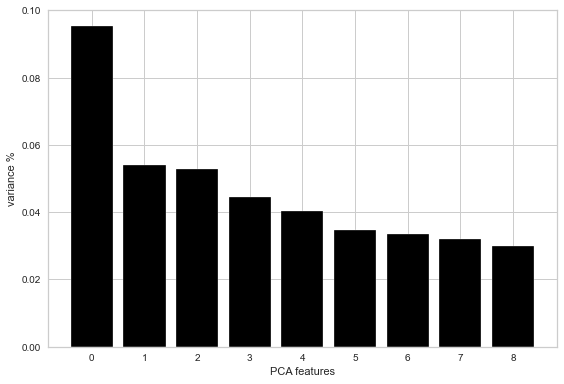

In [513]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
pca = PCA(n_components = 9) 
PCA_components = pd.DataFrame(pca.fit_transform(members_all_scaled))

features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_ratio_, color='black')
plt.xlabel('PCA features')
plt.ylabel('variance %')
plt.xticks(features);

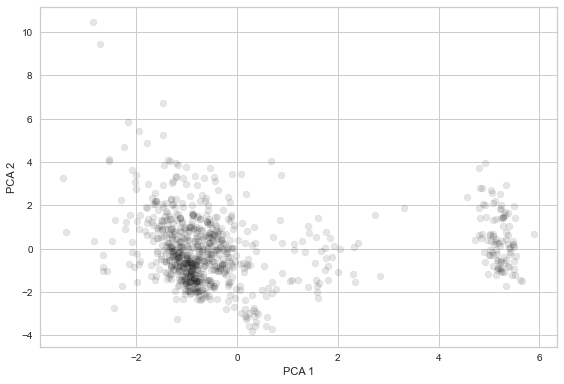

In [514]:
plt.scatter(PCA_components[0], PCA_components[1], alpha=.1, color='black')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2');

In [265]:
import matplotlib.pyplot as plt
import seaborn as sns
pca_test = PCA(n_components=13)
pca_test.fit(members_all_scaled)
sns.set(style='whitegrid')
plt.figure(figsize=(10,8))
plt.plot(np.cumsum(pca_test.explained_variance_ratio_));
plt.xlabel('number of components');
plt.ylabel('cumulative explained variance');
plt.axhline(linewidth=4, color='r', linestyle = '--', y=0.95);
display(plt.show());
evr = pca_test.explained_variance_ratio_
cvr = np.cumsum(pca_test.explained_variance_ratio_)
pca_df = pd.DataFrame()
pca_df['Cumulative Variance Ratio'] = cvr
pca_df['Explained Variance Ratio'] = evr
display(pca_df.tail(10));

ValueError: n_components=13 must be between 0 and min(n_samples, n_features)=9 with svd_solver='full'

In [515]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2) 
X_principal = pd.DataFrame(pca.fit_transform(members_all_scaled))

In [516]:
import scipy.cluster
aggl = scipy.cluster.hierarchy.linkage(X_principal, method='ward', metric='euclidean')

In [494]:
X_principal

,0,1
0,-0.473865,-0.517038
1,-0.669901,-0.782023
2,1.357055,-0.884409
3,5.112407,0.101743
4,-0.735213,-1.534263
...,...,...
792,-1.206735,-0.700161
793,-1.501652,-1.469609
794,-0.657879,-0.531751
795,-1.690983,-0.958823


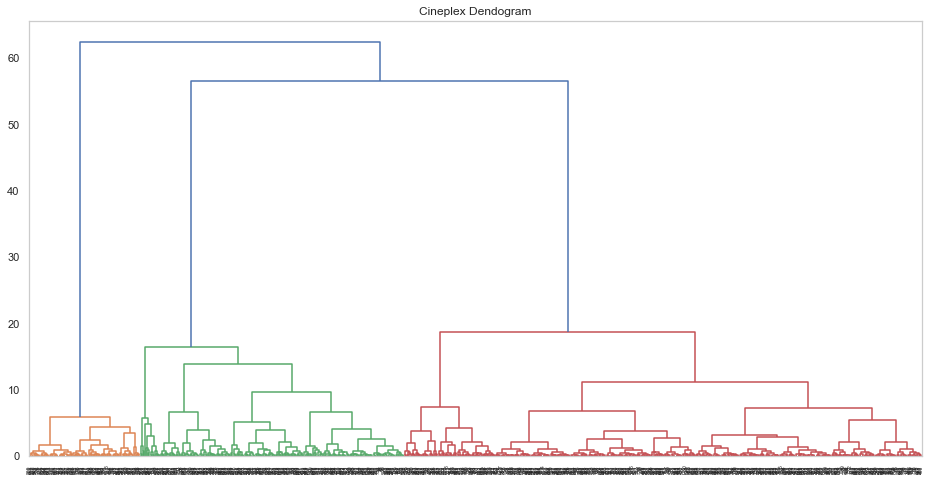

In [407]:
import matplotlib.pyplot as plt

# Plot the dendogram
plt.figure(figsize=(16, 8));
plt.grid(False)
plt.title("Cineplex Dendogram");  
dend = scipy.cluster.hierarchy.dendrogram(aggl)
plt.savefig(f"Clustering/h_cluster_plot.jpg");

Clusters: 2
Score: 0.6674 

Clusters: 3
Score: 0.4772 

Clusters: 4
Score: 0.3467 

Clusters: 5
Score: 0.3506 

Clusters: 6
Score: 0.3653 

Clusters: 7
Score: 0.3634 



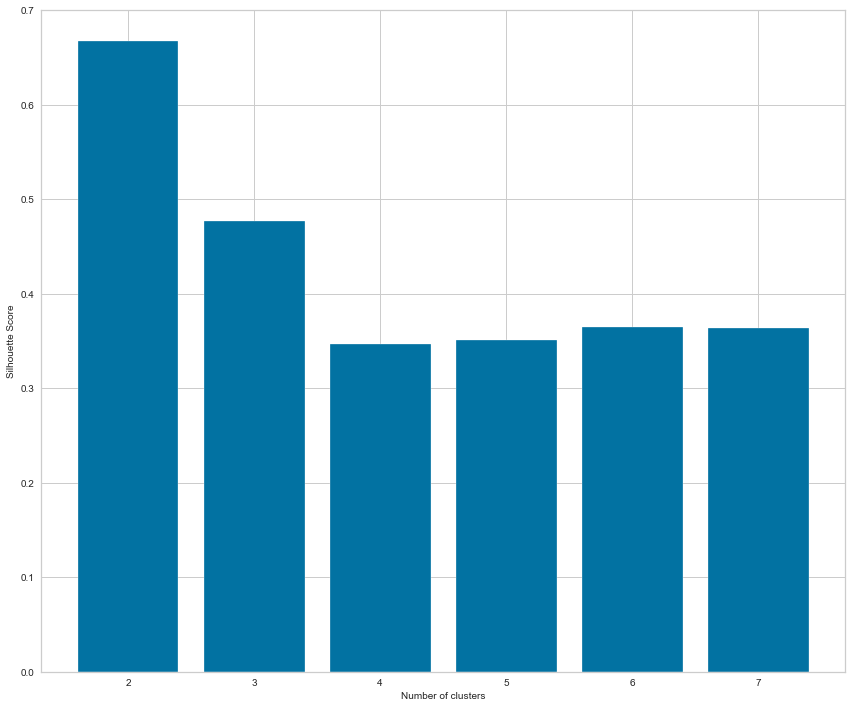

In [517]:
silhouette_scores = [] 

for n_cluster in range(2, 8):
    score = silhouette_score(X_principal, AgglomerativeClustering(n_clusters = n_cluster).fit_predict(X_principal))
    silhouette_scores.append(score)
    print(f"Clusters: {n_cluster}\nScore:", "%.4f" % score,"\n")
# Plotting a bar graph to compare the results 
k = [2, 3, 4, 5, 6,7] 
plt.figure(figsize=(12,10))
plt.bar(k, silhouette_scores) 
plt.xlabel('Number of clusters', fontsize = 10) 
plt.ylabel('Silhouette Score', fontsize = 10) 
plt.show();

'\n    Create KMeans instance for different number of clusters\n    '

'\n    Create SilhouetteVisualizer instance with KMeans instance\n    Fit the visualizer\n    '

/usr/local/lib/python3.7/site-packages/sklearn/base.py:213: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


SilhouetteVisualizer(ax=<AxesSubplot:>, colors='yellowbrick', model=None)

'\n    Create KMeans instance for different number of clusters\n    '

'\n    Create SilhouetteVisualizer instance with KMeans instance\n    Fit the visualizer\n    '

/usr/local/lib/python3.7/site-packages/sklearn/base.py:213: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


SilhouetteVisualizer(ax=<AxesSubplot:>, colors='yellowbrick', model=None)

'\n    Create KMeans instance for different number of clusters\n    '

'\n    Create SilhouetteVisualizer instance with KMeans instance\n    Fit the visualizer\n    '

/usr/local/lib/python3.7/site-packages/sklearn/base.py:213: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


SilhouetteVisualizer(ax=<AxesSubplot:>, colors='yellowbrick', model=None)

'\n    Create KMeans instance for different number of clusters\n    '

'\n    Create SilhouetteVisualizer instance with KMeans instance\n    Fit the visualizer\n    '

/usr/local/lib/python3.7/site-packages/sklearn/base.py:213: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


SilhouetteVisualizer(ax=<AxesSubplot:>, colors='yellowbrick', model=None)

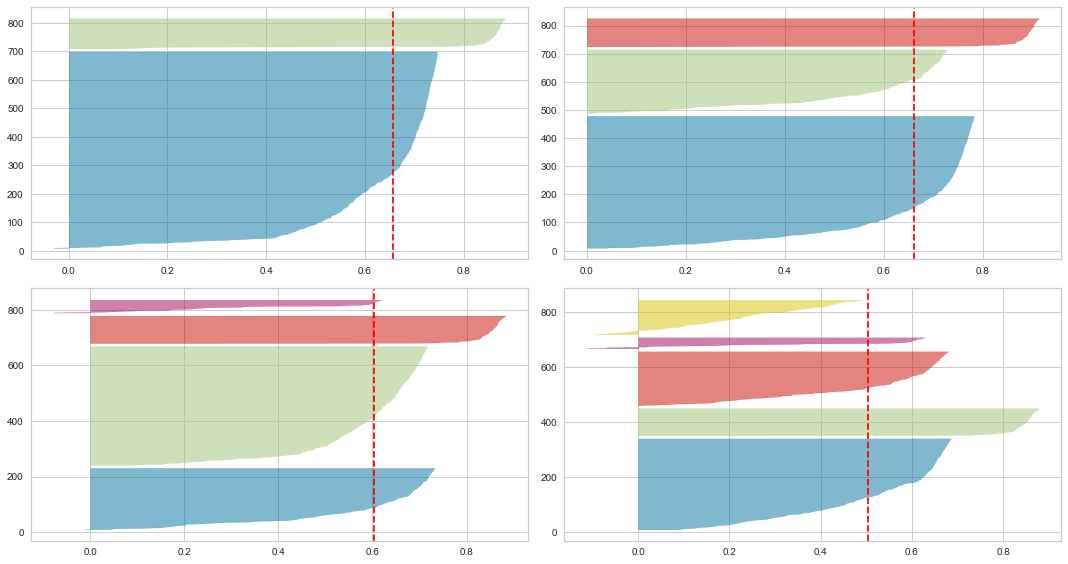

In [496]:
from yellowbrick.cluster import SilhouetteVisualizer

fig, ax = plt.subplots(2, 2, figsize=(15,8))
for i in [2, 3, 4, 5]:
    '''
    Create KMeans instance for different number of clusters
    '''
    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=100, random_state=42)
    q, mod = divmod(i, 2)
    '''
    Create SilhouetteVisualizer instance with KMeans instance
    Fit the visualizer
    '''
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(X_principal)

In [518]:
# Create the clustering model
h_cluster = AgglomerativeClustering(n_clusters = 3)

In [519]:
clusters = h_cluster.fit_predict(X_principal)

In [520]:
# number of instances in each cluster
np.bincount(clusters)

array([505,  99, 193])

In [521]:
# Add the cluster number to the original data
X_scaled_clustered = members_all
X_scaled_clustered['cluster'] = clusters
X_scaled_clustered.head()

,Visit_Date_count,Visit_Date_IsTuesday_mean,Visit_Date_IsWeekend_mean,Auditorium_Experience_ID_mode,Is_VIP_sum,Is_VIP_mean,Spend_mean,CINEPLEX_Item_ID_count,CINEPLEX_Item_ID_nunique,TimeSlice_Description_mode_1 - Early Matinee,...,Genre_Hierarchy_1_mode_Documentary,Genre_Hierarchy_1_mode_Drama,Genre_Hierarchy_1_mode_Family,Genre_Hierarchy_1_mode_Fantasy,Genre_Hierarchy_1_mode_Horror,Genre_Hierarchy_1_mode_Sequel,Genre_Hierarchy_1_mode_Suspense,Genre_Hierarchy_1_mode_Thriller,Genre_Hierarchy_1_mode_Unknown,cluster
0,1,1.0,0.0,1,1,1.0,17.15,17,12,0,...,0,1,0,0,0,0,0,0,0,0
1,1,0.0,0.0,1,0,0.0,33.74,35,11,0,...,0,0,0,0,0,0,0,0,0,0
2,2,0.0,0.5,0,0,0.0,57.98,58,18,0,...,0,1,0,0,0,0,0,0,0,0
3,1,0.0,0.0,0,0,0.0,48.29,36,11,0,...,0,0,0,0,0,0,0,0,1,1
4,1,0.0,0.0,1,0,0.0,31.58,20,11,0,...,0,0,0,0,0,0,0,0,0,0


In [479]:
X_scaled_clustered.groupby("cluster")['Genre_Hierarchy_1_mode_Action'].value_counts()

cluster  Genre_Hierarchy_1_mode_Action
0        0                                457
         1                                  5
1        0                                 99
2        0                                139
         1                                 97
Name: Genre_Hierarchy_1_mode_Action, dtype: int64

In [449]:
X_scaled_clustered.cluster.value_counts()

0    462
2    236
1     99
Name: cluster, dtype: int64

In [522]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None, 'display.float_format', lambda x: '%.1f' % x):
    X_scaled_clustered.groupby("cluster").mean().T

cluster,0,1,2
Visit_Date_count,1.6,1.3,2.7
Visit_Date_IsTuesday_mean,0.2,0.1,0.1
Visit_Date_IsWeekend_mean,0.5,0.5,0.6
Auditorium_Experience_ID_mode,1.1,0.0,1.3
Is_VIP_sum,0.1,0.3,0.7
Is_VIP_mean,0.1,0.3,0.4
Spend_mean,46.4,27.6,62.1
CINEPLEX_Item_ID_count,31.7,29.2,76.3
CINEPLEX_Item_ID_nunique,10.9,11.4,18.8
TimeSlice_Description_mode_1 - Early Matinee,0.4,0.2,0.2


In [385]:
X_scaled_clustered.to_csv('Clustering/clusters.csv', float_format='%.1f')

In [401]:
X_scaled_clustered.groupby("cluster").describe().T.to_csv('Clustering/cluster_describe.csv', float_format='%.1f')

In [398]:
X_scaled_clustered.groupby("cluster").mean()

,Visit_Date_count,Visit_Date_IsTuesday_mean,Visit_Date_IsWeekend_mean,Auditorium_Experience_ID_mode,Spend_mean,CINEPLEX_Item_ID_count,CINEPLEX_Item_ID_nunique,TimeSlice_Description_mode_1 - Early Matinee,TimeSlice_Description_mode_2 - Late Matinee,TimeSlice_Description_mode_3 - Early Evening,...,Genre_Hierarchy_1_mode_Comedy,Genre_Hierarchy_1_mode_Documentary,Genre_Hierarchy_1_mode_Drama,Genre_Hierarchy_1_mode_Family,Genre_Hierarchy_1_mode_Fantasy,Genre_Hierarchy_1_mode_Horror,Genre_Hierarchy_1_mode_Sequel,Genre_Hierarchy_1_mode_Suspense,Genre_Hierarchy_1_mode_Thriller,Genre_Hierarchy_1_mode_Unknown
cluster,,,,,,,,,,,,,,,,,,,,,
0,1.705628,0.128465,0.516420,1.153680,53.334067,40.274892,12.846320,0.350649,0.380952,0.212121,...,0.443723,0.002165,0.119048,0.017316,0.045455,0.000000,0.000000,0.000000,0.00000,0.000000
1,1.252525,0.109428,0.509740,0.000000,27.601200,29.222222,11.383838,0.191919,0.343434,0.323232,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,1.000000
2,2.211864,0.165517,0.466542,1.148305,45.783899,51.487288,13.661017,0.258475,0.288136,0.347458,...,0.152542,0.000000,0.169492,0.004237,0.000000,0.008475,0.004237,0.004237,0.04661,0.012712


In [381]:
X_p_clustered = X_principal
X_p_clustered = X_p_clustered.rename(columns={0:'P0', 1:'P1'})
X_p_clustered['cluster'] = clusters
X_p_clustered.head()
X_p_clustered['cluster'].value_counts()

,P0,P1,cluster
0,0.121045,-0.859894,0
1,-0.284033,-0.904981,0
2,-0.599231,-0.481412,0
3,4.084085,-0.385774,1
4,-0.478405,-1.617494,0


0    462
2    236
1     99
Name: cluster, dtype: int64

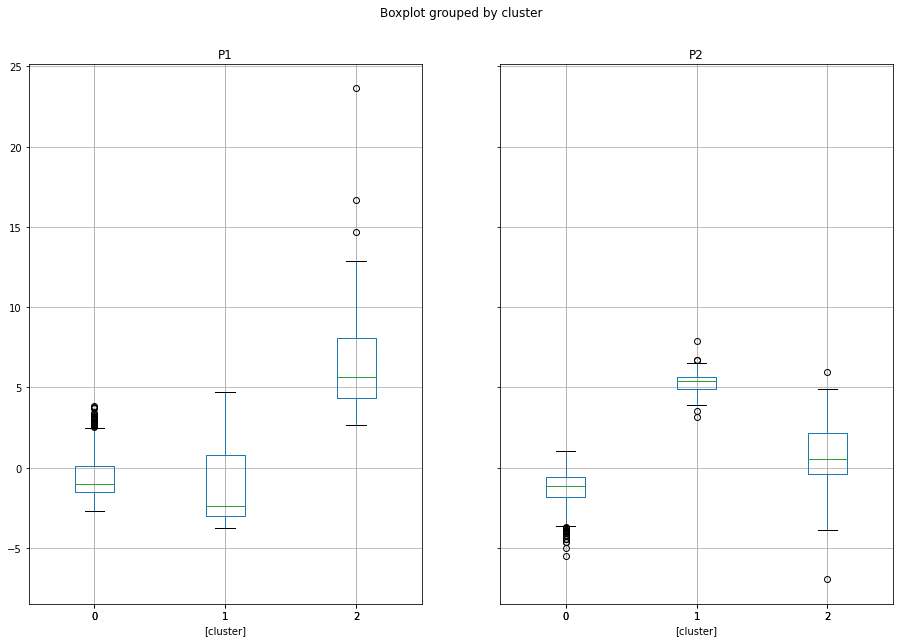

In [263]:
boxplots = X_p_clustered.boxplot(by='cluster', figsize=(15,10));
boxplots;

In [ ]:
for feature in X_scaled_clustered:
    fig = X_scaled_clustered.boxplot(column=feature, by="cluster",figsize=(14,10)).get_figure();
    fig.savefig(f"Boxplots/{feature}_plot.png");
print("Plots saved")

In [453]:
X_p_clustered

,P0,P1,cluster
0,0.121045,-0.859894,0
1,-0.284033,-0.904981,0
2,-0.599231,-0.481412,0
3,4.084085,-0.385774,1
4,-0.478405,-1.617494,0
...,...,...,...
792,-1.125001,-0.492929,0
793,-1.410652,-1.367678,0
794,-0.201928,-0.676536,0
795,-1.533127,-0.923028,0


In [452]:
X_scaled_clustered.cluster.value_counts()

0    462
2    236
1     99
Name: cluster, dtype: int64

In [458]:
X_p_clustered.cluster

0      0
1      0
2      0
3      1
4      0
      ..
792    0
793    0
794    0
795    0
796    1
Name: cluster, Length: 797, dtype: int64

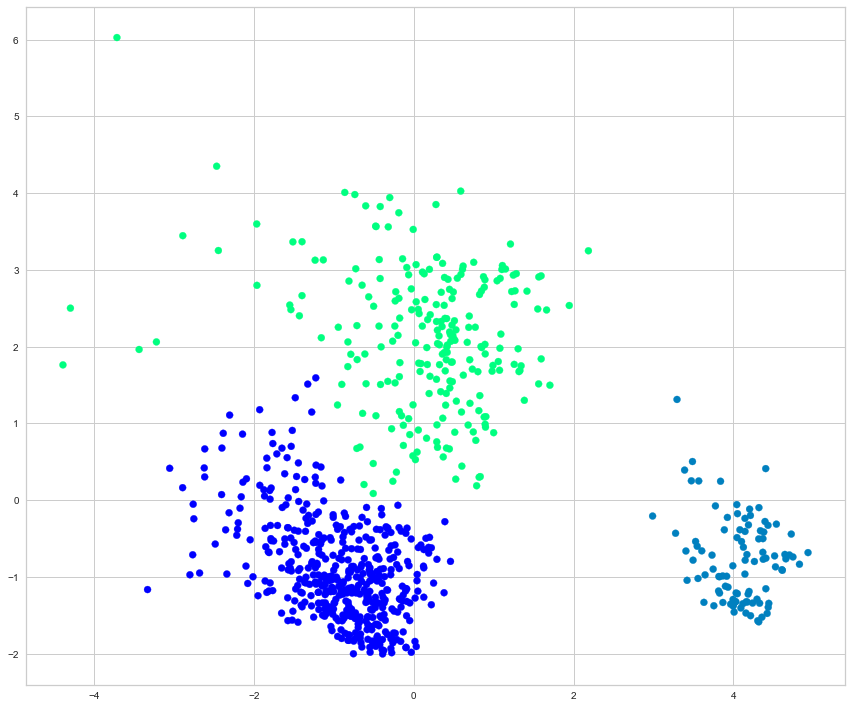

In [462]:
# Visualizing the clustering
plt.figure(figsize=(12,10))
plt.scatter(X_p_clustered['P0'], X_p_clustered['P1'],  
           c = X_p_clustered.cluster, cmap =plt.cm.winter)
plt.show();

Clusters: 2
Score: 0.1153 

Clusters: 3
Score: 0.1277 

Clusters: 4
Score: 0.1051 

Clusters: 5
Score: 0.1141 

Clusters: 6
Score: 0.1209 

Clusters: 7
Score: 0.1200 



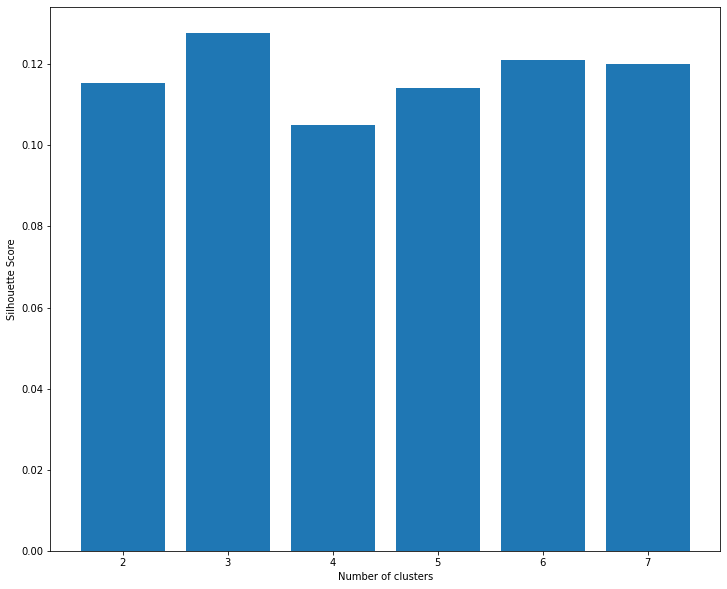

In [200]:
silhouette_scores = [] 

for n_cluster in range(2, 8):
    score = silhouette_score(members_all, AgglomerativeClustering(n_clusters = n_cluster).fit_predict(members_all))
    silhouette_scores.append(score)
    print(f"Clusters: {n_cluster}\nScore:", "%.4f" % score,"\n")
# Plotting a bar graph to compare the results 
k = [2, 3, 4, 5, 6,7] 
plt.figure(figsize=(12,10))
plt.bar(k, silhouette_scores) 
plt.xlabel('Number of clusters', fontsize = 10) 
plt.ylabel('Silhouette Score', fontsize = 10) 
plt.show();

In [416]:
members_all_scaled_c = members_all_scaled
members_all_scaled_c['cluster'] = clusters
members_all_scaled_c['cluster'].value_counts()

0    462
2    236
1     99
Name: cluster, dtype: int64

In [413]:
def display_parallel_coordinates_centroids(df, num_clusters):
    '''Display a parallel coordinates plot for the centroids in df'''

    import seaborn as sns
    palette = sns.color_palette("bright", 10)
    # Create the plot
    fig = plt.figure(figsize=(22, 10))
    title = fig.suptitle("Parallel Coordinates plot for the Centroids", fontsize=18)
#     fig.subplots_adjust(top=0.9, bottom=0.5, wspace=0)
    plt.xticks(rotation=90)
    # Draw the chart
    ax=plt.gca()
    ax.grid(False)
    from matplotlib import rcParams
    rcParams.update({'figure.autolayout': True})
    return pd.plotting.parallel_coordinates(df, 'cluster', color=palette,axvlines=False);

    # Stagger the axes
    
    
#     for tick in ax.xaxis.get_major_ticks()[1::2]:
#         tick.set_pad(20)    
    

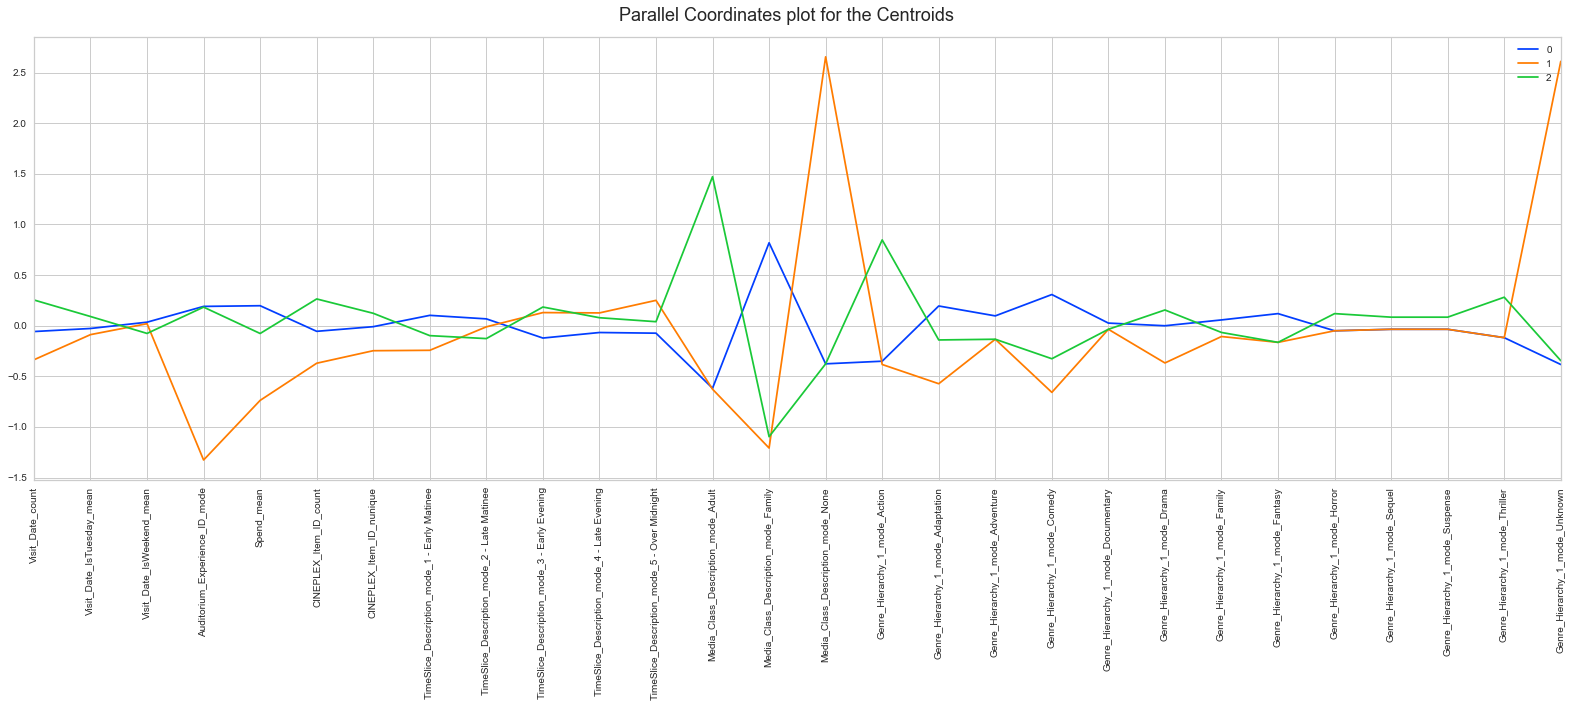

In [417]:
display_parallel_coordinates_centroids(members_all_scaled_c.groupby("cluster").mean().reset_index(), 3);

In [ ]:
for i in range(0,68,6):
    if(i==66):
        display_parallel_coordinates_centroids(X_scaled_clustered.iloc[:, list(range(i,i+2))+[68]].groupby(by="cluster").mean().reset_index(), 3).get_figure().savefig(f"parallel_plots/parallel_plots_{i}.jpeg");  
    else:
        display_parallel_coordinates_centroids(X_scaled_clustered.iloc[:, list(range(i,i+6))+[68]].groupby(by="cluster").mean().reset_index(), 3).get_figure().savefig(f"parallel_plots/parallel_plots_{i}.jpeg");

In [203]:
from scipy import stats

pd.set_option("display.precision", 2)
pd.set_option('display.float_format', lambda x: '%.2f' % x)


def stats_to_df(d, scaler):
    tmp_df = pd.DataFrame(columns=col_names)
    
    tmp_df.loc[0] = scaler.inverse_transform(d.minmax[0])
    tmp_df.loc[1] = scaler.inverse_transform(d.mean)
    tmp_df.loc[2] = scaler.inverse_transform(d.minmax[1])
    tmp_df.loc[3] = scaler.inverse_transform(d.variance)
    tmp_df.loc[4] = scaler.inverse_transform(d.skewness)
    tmp_df.loc[5] = scaler.inverse_transform(d.kurtosis)
    tmp_df.index = ['Min', 'Mean', 'Max', 'Variance', 'Skewness', 'Kurtosis'] 
    return tmp_df.T

print('All Data:')
print('Number of Instances: {}'.format(members_all_scaled_c.shape[0]))
d = stats.describe(members_all_scaled_c, axis=0)
display(stats_to_df(d, scaler))

for i, label in enumerate(set(labels)):
    d = stats.describe(members_all[labels==label], axis=0)
    print('\nCluster {}:'.format(label))
    print('Number of Instances: {}'.format(d.nobs))
    display(stats_to_df(d, scaler))

All Data:
Number of Instances: 797


,Min,Mean,Max,Variance,Skewness,Kurtosis
Visit_Date_count,1.00,1.80,17.00,3.43,7.91,34.55
Visit_Date_IsTuesday_mean,0.00,0.14,1.00,0.45,0.81,1.07
Visit_Date_IsWeekend_mean,0.00,0.50,1.00,0.95,0.50,-0.30
Auditorium_Experience_ID_nunique,1.00,1.16,3.00,1.58,2.21,3.59
Auditorium_Experience_ID_mode,0.00,1.01,5.00,1.77,2.87,9.34
...,...,...,...,...,...,...
Genre_Hierarchy_1_mode_Horror,0.00,0.00,1.00,0.05,1.00,19.69
Genre_Hierarchy_1_mode_Sequel,0.00,0.00,1.00,0.04,1.00,28.04
Genre_Hierarchy_1_mode_Suspense,0.00,0.00,1.00,0.04,1.00,28.04
Genre_Hierarchy_1_mode_Thriller,0.00,0.01,1.00,0.13,0.99,7.89



Cluster 1:
Number of Instances: 133


,Min,Mean,Max,Variance,Skewness,Kurtosis
Visit_Date_count,1.00,1.46,7.00,2.20,7.18,29.40
Visit_Date_IsTuesday_mean,0.00,0.10,1.00,0.39,0.94,1.74
Visit_Date_IsWeekend_mean,0.00,0.52,1.00,0.96,0.45,-0.30
Auditorium_Experience_ID_nunique,1.00,1.29,2.00,1.66,1.56,0.71
Auditorium_Experience_ID_mode,0.00,-0.00,0.00,1.01,1.77,-0.51
...,...,...,...,...,...,...
Genre_Hierarchy_1_mode_Horror,0.00,-0.00,0.00,0.00,0.05,-0.10
Genre_Hierarchy_1_mode_Sequel,0.00,0.00,0.00,0.00,0.00,-0.10
Genre_Hierarchy_1_mode_Suspense,0.00,0.00,0.00,0.00,0.00,-0.10
Genre_Hierarchy_1_mode_Thriller,0.00,0.02,1.00,0.14,0.94,7.19



Cluster 2:
Number of Instances: 78


,Min,Mean,Max,Variance,Skewness,Kurtosis
Visit_Date_count,1.00,5.26,17.00,6.65,4.58,7.56
Visit_Date_IsTuesday_mean,0.00,0.12,1.00,0.25,0.81,1.86
Visit_Date_IsWeekend_mean,0.00,0.52,1.00,0.66,0.41,0.24
Auditorium_Experience_ID_nunique,1.00,1.85,3.00,2.36,1.26,0.77
Auditorium_Experience_ID_mode,0.00,1.21,5.00,1.77,3.70,11.85
...,...,...,...,...,...,...
Genre_Hierarchy_1_mode_Horror,0.00,-0.00,0.00,0.00,0.05,-0.10
Genre_Hierarchy_1_mode_Sequel,0.00,0.00,0.00,0.00,-0.03,-0.07
Genre_Hierarchy_1_mode_Suspense,0.00,0.00,0.00,0.00,-0.03,-0.07
Genre_Hierarchy_1_mode_Thriller,0.00,0.00,0.00,0.01,-0.10,-0.22



Cluster 3:
Number of Instances: 586


,Min,Mean,Max,Variance,Skewness,Kurtosis
Visit_Date_count,1.00,1.42,7.00,2.20,5.97,15.80
Visit_Date_IsTuesday_mean,0.00,0.15,1.00,0.49,0.76,0.84
Visit_Date_IsWeekend_mean,0.00,0.49,1.00,0.99,0.51,-0.33
Auditorium_Experience_ID_nunique,1.00,1.05,2.00,1.27,2.96,8.12
Auditorium_Experience_ID_mode,1.00,1.21,5.00,1.58,4.15,15.41
...,...,...,...,...,...,...
Genre_Hierarchy_1_mode_Horror,0.00,0.00,1.00,0.07,0.85,14.41
Genre_Hierarchy_1_mode_Sequel,0.00,0.00,1.00,0.05,0.86,20.57
Genre_Hierarchy_1_mode_Suspense,0.00,0.00,1.00,0.05,0.86,20.57
Genre_Hierarchy_1_mode_Thriller,0.00,0.02,1.00,0.14,0.93,7.03


In [434]:
# Or, we could have used panda's group-by function
import pandas as pd

X_df = pd.DataFrame(scaler.inverse_transform(members_all_scaled), columns=members_all_scaled.columns)
X_df['cluster'] = clusters

cl_group = X_df.groupby(['cluster']).agg(['count', 'mean']).T
with pd.option_context('display.max_rows', None, 'display.max_columns', None, 'display.float_format', lambda x: '%.1f' % x):
    display(cl_group)


ValueError: operands could not be broadcast together with shapes (797,29) (28,) (797,29) 